## Introduction
Development applications serve as a leading indicator of neighborhood vitality and investment. Using the Allegheny County Conservation District's development permit data from 2020-2024, I analyzed which municipality demonstrates the most active development pipeline. This dataset captures land disturbance permits required for construction, infrastructure, and development projects across the county.

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('applications-for-development-2020-2024.csv')

# Initial exploration
print("Dataset shape:", df.shape)
print("\nColumn names:")
print(df.columns.tolist())

# Display first few rows as a nice table
print("\nFirst few rows:")
display(df.head())  # Use display() instead of print(df.head())

# Check unique municipalities - display as table
print(f"\nNumber of unique municipalities: {df['Municipality'].nunique()}")

# Top municipalities as a styled DataFrame
top_munis = df['Municipality'].value_counts().head(10).reset_index()
top_munis.columns = ['Municipality', 'Number of Applications']
print("\nTop 10 Municipalities by Development Applications:")
display(top_munis)

# Filter to Pittsburgh
pgh_df = df[df['Municipality'] == 'Pittsburgh'].copy()

# Show Pittsburgh stats as a table
stats_data = {
    'Metric': ['Total Applications', 'Pittsburgh Applications', 'Pittsburgh Percentage'],
    'Value': [len(df), len(pgh_df), f"{len(pgh_df)/len(df)*100:.1f}%"]
}
stats_df = pd.DataFrame(stats_data)
print("\nPittsburgh Statistics:")
display(stats_df)

Dataset shape: (1197, 11)

Column names:
['Municipality', 'Feature ID', 'Status', 'Application Date', 'Application Date_Sort', 'Acres', 'Land Use', 'Pre-Construction Impervious', 'Post-Construction Impervious', 'Discharge Points', 'Maximized Non-Structural Volume Credits?']

First few rows:


,Municipality,Feature ID,Status,Application Date,Application Date_Sort,Acres,Land Use,Pre-Construction Impervious,Post-Construction Impervious,Discharge Points,Maximized Non-Structural Volume Credits?
0,Pittsburgh,ACCD20001,Issued/Authorized,1/14/2020,20200114,0.40,Commercial/Industrial,-999.0,-999.0,-999,
1,Richland Township,ACCD20003,Issued/Authorized,1/22/2020,20200122,0.02,Residential-Private,-999.0,-999.0,-999,
2,Penn Hills Municipality,ACCD20004,Issued/Authorized,1/24/2020,20200124,0.90,Borrow/Disposal Site,-999.0,-999.0,-999,
3,Pittsburgh,ACCD20007,Issued/Authorized,2/13/2020,20200213,0.20,Residential-Subdivision,-999.0,-999.0,-999,
4,Pleasant Hills Borough,ACCD20008,Issued/Authorized,3/2/2020,20200302,0.91,Commercial/Industrial,-999.0,-999.0,-999,



Number of unique municipalities: 102

Top 10 Municipalities by Development Applications:


,Municipality,Number of Applications
0,Pittsburgh,167
1,Moon Township,53
2,Plum Borough,44
3,Fox Chapel Borough,42
4,North Fayette Township,39
5,South Fayette Township,36
6,Monroeville Municipality,36
7,Findlay Township,31
8,Jefferson Hills Borough,30
9,Robinson Township,29



Pittsburgh Statistics:


,Metric,Value
0,Total Applications,1197
1,Pittsburgh Applications,167
2,Pittsburgh Percentage,14.0%


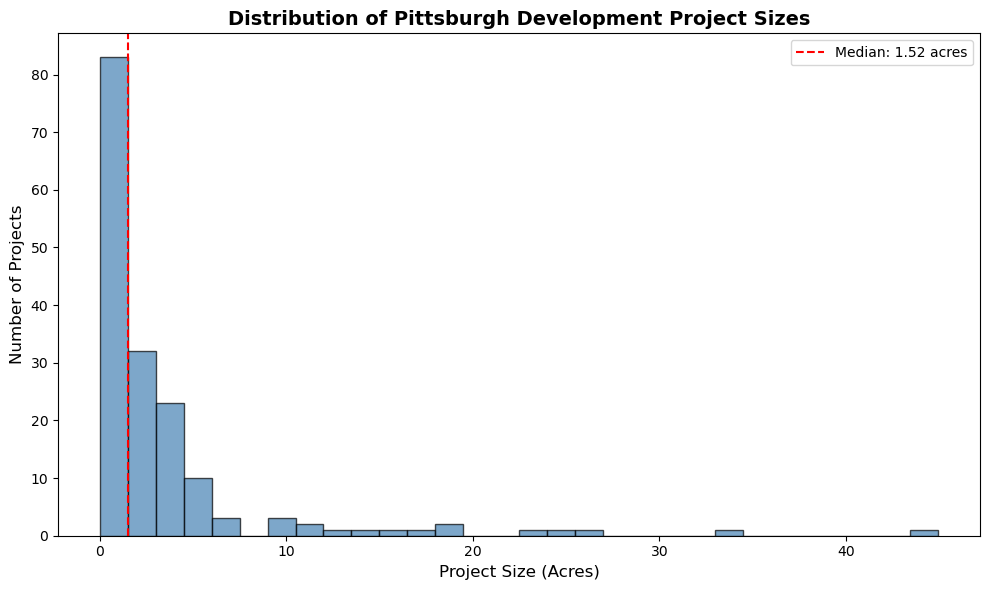

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Clean the Acres column first
pgh_df['Acres_clean'] = pd.to_numeric(pgh_df['Acres'], errors='coerce')
pgh_df['Acres_clean'] = pgh_df['Acres_clean'].replace(-999, pd.NA)

# Now filter for the histogram - use notna() and valid ranges
pgh_df_clean = pgh_df[
    pgh_df['Acres_clean'].notna() & 
    (pgh_df['Acres_clean'] > 0) & 
    (pgh_df['Acres_clean'] < 50)
].copy()

# Histogram of project sizes
plt.figure(figsize=(10, 6))
plt.hist(pgh_df_clean['Acres_clean'], bins=30, 
         color='steelblue', edgecolor='black', alpha=0.7)
plt.xlabel('Project Size (Acres)', fontsize=12)
plt.ylabel('Number of Projects', fontsize=12)
plt.title('Distribution of Pittsburgh Development Project Sizes', 
          fontsize=14, fontweight='bold')
plt.axvline(pgh_df_clean['Acres_clean'].median(), 
            color='red', linestyle='--', 
            label=f'Median: {pgh_df_clean["Acres_clean"].median():.2f} acres')
plt.legend()
plt.tight_layout()
plt.show()

## Analysis and Results

In [22]:
# Calculate Pittsburgh's ranking
muni_counts = df['Municipality'].value_counts()
pgh_rank = list(muni_counts.index).index('Pittsburgh') + 1
print(f"Pittsburgh ranks #{pgh_rank} out of {df['Municipality'].nunique()} municipalities")
print(f"with {len(pgh_df)} applications")

Pittsburgh ranks #1 out of 102 municipalities
with 167 applications
